In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from numpy.typing import NDArray

In [17]:
def compress_img(img: NDArray[np.uint8], k: int):
    U, S, Vt = np.linalg.svd(img, full_matrices=False)
    compressed_img = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    return compressed_img, S

In [18]:
img_path = "Lab04 Plane.png"
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
m, n = img.shape

Compressed Image (k = 5):
Compression Ratio: 0.01
Retained Energy: 0.49

Compressed Image (k = 10):
Compression Ratio: 0.01
Retained Energy: 0.56

Compressed Image (k = 50):
Compression Ratio: 0.07
Retained Energy: 0.74

Compressed Image (k = 100):
Compression Ratio: 0.14
Retained Energy: 0.83



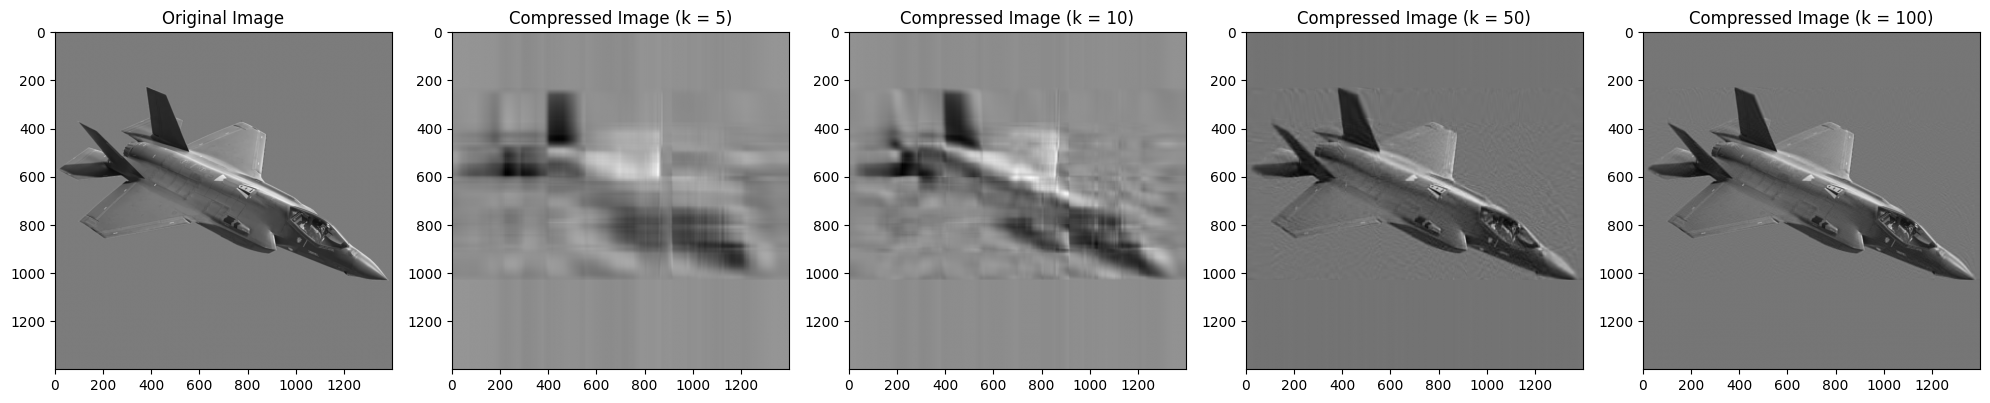

In [19]:
k_values = [5, 10, 50, 100]
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(20, 4))
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original Image")

for i, k in enumerate(k_values):
    compressed_img, S = compress_img(img, k)
    compression_ratio = (m * k + k + n * k) / (m * n)
    retained_energy = np.sum(S[:k]) / np.sum(S)

    print(f"Compressed Image (k = {k}):")
    print(f"Compression Ratio: {compression_ratio:.2f}")
    print(f"Retained Energy: {retained_energy:.2f}")
    print()

    axes[i + 1].imshow(compressed_img, cmap="gray")
    axes[i + 1].set_title(f"Compressed Image (k = {k})")

plt.tight_layout()
plt.show()